### Zestaw 1

In [15]:
import numpy as np
import torch
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

#### Zadanie 1 - Operacje matematyczne w uczeniu głębokim

##### Co to jest tensor?
Tensor to uogólnienie macierzy na dowolną liczbę wymiarów. Jest to struktura danych, która może być traktowana jako wektor, macierz lub coś o jeszcze wyższym wymiarze (np. tensor 3D, 4D). W uczeniu maszynowym i głębokim, dane są zazwyczaj reprezentowane jako tensory, ponieważ są one łatwe do przechowywania i przetwarzania.

1. Zareprezentować tensory za pomocą biblioteki Numpy i Pytorch.
2. Znaleźć metody do diagnostyki typu, wymiaru, wymiarów (postaci) tensora.
3. Pokazać operacje: slicing, reshaping, broadcasting.
4. Pokazać operacje elementarne na tensorze, np. dodawanie, mnożenie (różnych typów iloczynów
jest wiele).

In [16]:
def tensor_introduction():
    # Tworzenie tensorów w Numpy
    tensor_np = np.array([[1, 2], [3, 4], [5, 6]])
    tensor_shape_np = tensor_np.shape
    tensor_type_np = type(tensor_np)

    # Tworzenie tensorów w PyTorch
    tensor_pt = torch.tensor([[1, 2], [3, 4], [5, 6]], dtype=torch.float32)
    tensor_shape_pt = tensor_pt.shape
    tensor_type_pt = type(tensor_pt)

    # Diagnostyka tensorów
    dtype_pt = tensor_pt.dtype  # Typ danych
    device_pt = tensor_pt.device  # Urządzenie (np. CPU/GPU)

    # Operacje na tensorach: slicing, reshaping
    slicing_np = tensor_np[:, 1]
    reshaping_np = tensor_np.reshape(2, 3)

    slicing_pt = tensor_pt[:, 1]
    reshaping_pt = tensor_pt.view(2, 3)

    # Broadcasting w Numpy i PyTorch
    broadcast_np = tensor_np + np.array([1, 2])
    broadcast_pt = tensor_pt + torch.tensor([1, 2], dtype=torch.float32)

    # Mnożenie tensorów w Numpy i PyTorch
    multiplication_np = tensor_np * np.array([2, 3])
    multiplication_pt = tensor_pt * torch.tensor([2, 3], dtype=torch.float32)

    # Wyświetlenie wyników
    print("=== Numpy Tensor ===")
    print("Tensor:\n", tensor_np)
    print("Type:", tensor_type_np)
    print("Shape:", tensor_shape_np)
    print("Slicing:\n", slicing_np)
    print("Reshaping:\n", reshaping_np)
    print("Broadcasting:\n", broadcast_np)
    print("Multiplication:\n", multiplication_np)
    print("\n=== PyTorch Tensor ===")
    print("Tensor:\n", tensor_pt)
    print("Type:", tensor_type_pt)
    print("Shape:", tensor_shape_pt)
    print("Dtype:", dtype_pt)
    print("Device:", device_pt)
    print("Slicing:\n", slicing_pt)
    print("Reshaping:\n", reshaping_pt)
    print("Broadcasting:\n", broadcast_pt)
    print("Multiplication:\n", multiplication_pt)

# Wywołanie funkcji
tensor_introduction()

=== Numpy Tensor ===
Tensor:
 [[1 2]
 [3 4]
 [5 6]]
Type: <class 'numpy.ndarray'>
Shape: (3, 2)
Slicing:
 [2 4 6]
Reshaping:
 [[1 2 3]
 [4 5 6]]
Broadcasting:
 [[2 4]
 [4 6]
 [6 8]]
Multiplication:
 [[ 2  6]
 [ 6 12]
 [10 18]]

=== PyTorch Tensor ===
Tensor:
 tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
Type: <class 'torch.Tensor'>
Shape: torch.Size([3, 2])
Dtype: torch.float32
Device: cpu
Slicing:
 tensor([2., 4., 6.])
Reshaping:
 tensor([[1., 2., 3.],
        [4., 5., 6.]])
Broadcasting:
 tensor([[2., 4.],
        [4., 6.],
        [6., 8.]])
Multiplication:
 tensor([[ 2.,  6.],
        [ 6., 12.],
        [10., 18.]])


##### Zadanie 2 - Różniczkowanie w uczenie głębokim

1. Jakie są metody licznia pochodnych?
- Metoda różniczkowania symbolicznego: Oblicza dokładne wyrażenia dla pochodnych. Jest wykorzystywana w narzędziach matematycznych, takich jak SymPy. W praktyce nie jest stosowana w uczeniu głębokim z powodu złożoności obliczeniowej.

- Metoda różniczkowania numerycznego: Oblicza przybliżoną wartość pochodnych przy użyciu różnic skończonych. Jest łatwa do zaimplementowania, ale nieefektywna i może być niedokładna.

- Automatyczne różniczkowanie (autograd): Najbardziej popularna metoda w uczeniu głębokim. Pozwala na automatyczne obliczanie pochodnych za pomocą propagacji wstecznej (backpropagation). Jest stosowana w bibliotekach takich jak TensorFlow i PyTorch. Automatycznie śledzi operacje i tworzy wykres obliczeń, co pozwala na obliczanie gradientów efektywnie.

2. Po co liczyć pochodne (gradienty) w uczeniu maszynowym/głębokim?
- Gradienty są kluczowe w procesie optymalizacji funkcji kosztu (ang. loss function). W uczeniu maszynowym gradienty wskazują kierunek, w którym model powinien się zmienić, aby zmniejszyć funkcję kosztu i poprawić swoje działanie. Gradienty są wielowymiarowymi pochodnymi i służą do aktualizowania wag modelu podczas procesu trenowania, wykorzystując algorytmy optymalizacji, takie jak stochastic gradient descent (SGD).

3. Jak się liczy pochodne w uczeniu głębokim?
- W uczeniu głębokim pochodne są liczone przy użyciu propagacji wstecznej (backpropagation), co pozwala obliczyć gradienty funkcji kosztu względem parametrów modelu (wag). Pochodne te są następnie używane przez algorytmy optymalizacji, aby aktualizować wagi modelu, minimalizując błąd predykcji.

4. Działanie metody: GradientTape (TensorFlow/Keras) i Autograd (Pytorch).

In [17]:
### AUTOGRAD

# Tworzymy tensor z możliwością śledzenia operacji (requires_grad=True)
x = torch.tensor(3.0, requires_grad=True)
print("Tensor:", x)

# Definiujemy funkcję, np. y = x^2
y = x ** 2

# Obliczamy gradient przez propagację wsteczną
y.backward()

# Wyświetlamy gradient (dy/dx)
print("Gradient (dy/dx):", x.grad)

Tensor: tensor(3., requires_grad=True)
Gradient (dy/dx): tensor(6.)


In [18]:
# Tworzymy zmienną do śledzenia
x = tf.Variable(3.0)

# Używamy GradientTape do rejestrowania operacji
with tf.GradientTape() as tape:
    # Definiujemy funkcję, np. y = x^2
    y = x ** 2

# Obliczamy gradient (dy/dx)
grad = tape.gradient(y, x)

# Wyświetlamy gradient
print("Gradient (dy/dx):", grad)

Gradient (dy/dx): tf.Tensor(6.0, shape=(), dtype=float32)


##### Zadanie 3 - Szablon uczenia sieci neuronowej

##### Zadanie 4 - Pojedynczy neuron

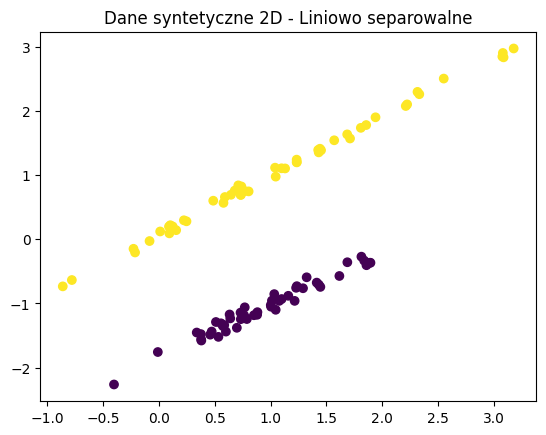

13666/13666 [==============================] - 10s 698us/step


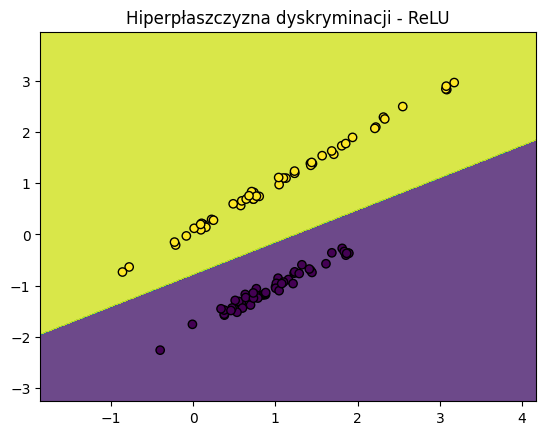

13666/13666 [==============================] - 9s 670us/step


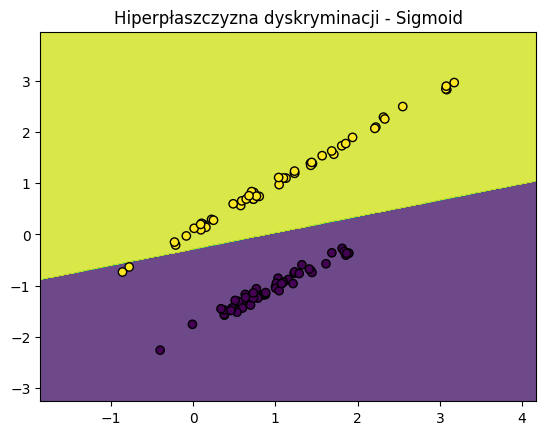

13666/13666 [==============================] - 9s 628us/step


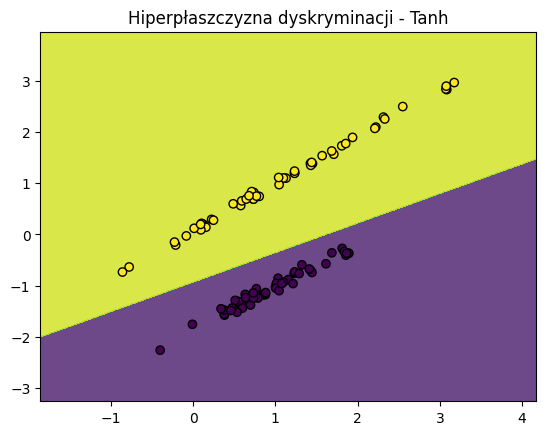

In [14]:
# Generowanie danych liniowo separowalnych
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_informative=2, n_redundant=0, random_state=42)

# Wizualizacja danych
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Dane syntetyczne 2D - Liniowo separowalne')
plt.show()

# Budowa modelu pojedynczego neuronu
def build_model(activation_function):
    model = Sequential()
    model.add(Dense(1, input_dim=2, activation=activation_function, kernel_initializer='he_uniform'))
    model.compile(optimizer=SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Trening modelu z aktywacją ReLU
model_relu = build_model('relu')
history_relu = model_relu.fit(X, y, epochs=100, verbose=0)

# Trening modelu z aktywacją Sigmoid
model_sigmoid = build_model('sigmoid')
history_sigmoid = model_sigmoid.fit(X, y, epochs=100, verbose=0)

# Trening modelu z aktywacją Tanh
model_tanh = build_model('tanh')
history_tanh = model_tanh.fit(X, y, epochs=100, verbose=0)

# Funkcja do rysowania hiperpłaszczyzny dyskryminacji
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred = model.predict(grid)
    pred = (pred > 0.5).astype(int)
    pred = pred.reshape(xx.shape)
    
    plt.contourf(xx, yy, pred, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
    plt.title(title)
    plt.show()

# Wizualizacja hiperpłaszczyzn dla różnych funkcji aktywacji
plot_decision_boundary(model_relu, X, y, 'Hiperpłaszczyzna dyskryminacji - ReLU')
plot_decision_boundary(model_sigmoid, X, y, 'Hiperpłaszczyzna dyskryminacji - Sigmoid')
plot_decision_boundary(model_tanh, X, y, 'Hiperpłaszczyzna dyskryminacji - Tanh')


##### Zadanie 5 - Sieć MLP

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1344      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
20/20 [==============================] - 1s 11ms/step - loss: 0.5942 - accuracy: 0.6797 - val_loss: 0.4603 - val_accuracy: 0.7750
Epoch 2/50
20/20 [=========================

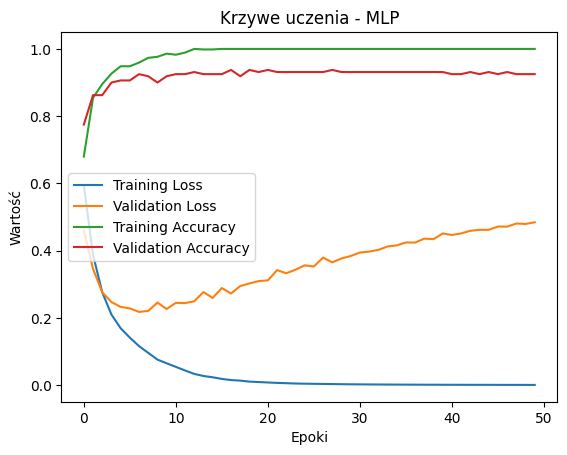

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Generowanie syntetycznych danych dla klasyfikacji binarnej
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, n_informative=15, random_state=42)

# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Budowanie modelu MLP
def build_mlp_model(input_dim, num_hidden_layers=3, num_neurons_per_layer=64, activation='relu', learning_rate=0.001):
    model = Sequential()
    
    # Warstwa wejściowa
    model.add(Dense(num_neurons_per_layer, activation=activation, input_dim=input_dim))
    
    # Warstwy ukryte
    for _ in range(num_hidden_layers - 1):
        model.add(Dense(num_neurons_per_layer, activation=activation))
    
    # Warstwa wyjściowa (dla klasyfikacji binarnej)
    model.add(Dense(1, activation='sigmoid'))
    
    # Kompilacja modelu
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Budowa modelu MLP
model_mlp = build_mlp_model(input_dim=X_train.shape[1], num_hidden_layers=3, num_neurons_per_layer=64, activation='relu', learning_rate=0.001)

# Wyświetlenie architektury modelu
model_mlp.summary()

# Trening modelu
history = model_mlp.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Ewaluacja modelu na zbiorze testowym
test_loss, test_accuracy = model_mlp.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Wizualizacja krzywych uczenia
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Krzywe uczenia - MLP')
plt.xlabel('Epoki')
plt.ylabel('Wartość')
plt.legend()
plt.show()
